# The Sparks Foundation
# Data Science & Business Analytics Tasks - June 2021

# Task 1 - Prediction using Supervised ML

### Task: What will be predicted score if a student studies for 9.25 hrs/ day?

##### Submitted by: Ishpreet Singh

**Importing all the libraries required in this notebook**

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

**Reading data from the link**

In [3]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**More details from the dataset**

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Checking for null values**

In [6]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

**Plotting the distribution of scores**

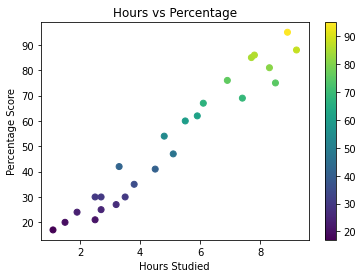

In [8]:
plt.scatter(x = df['Hours'], y=df['Scores'], c=df['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.colorbar()
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

**Plotting the correlation HeatMap**

<AxesSubplot:>

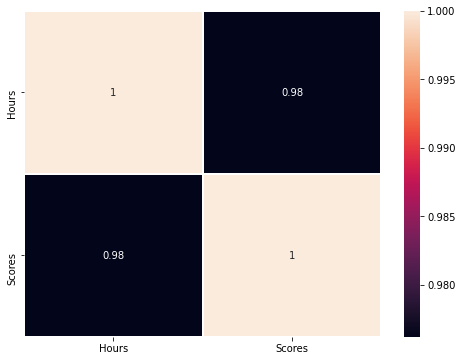

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot = True ,linewidth = 0.8)

**Dividing data into features and target variable**

In [14]:
X = df.drop("Scores",axis=1) 
y = df["Scores"] 

**Splitting data into training and test sets**

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y,test_size=0.3,random_state=1)

**Training the data**

In [16]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Plotting the regression line**

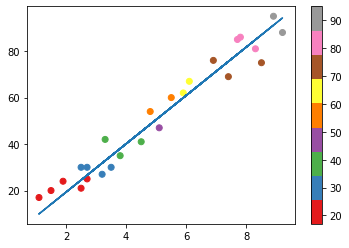

In [19]:
line = lr.coef_*X+lr.intercept_
plt.scatter(X, y, c=y, cmap='Set1')
plt.plot(X, line)
plt.colorbar()
plt.show()

**Making Predictions**

In [21]:
y_pred = lr.predict(X_test) 

**Comparing Actual vs Predicted**

In [23]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
14,17,9.939530
13,42,32.843201
17,24,18.268138
3,75,86.979152
21,54,48.459341
10,85,78.650544
18,67,61.993329
19,69,75.527316


**Evaluating the model**

In [24]:
import sklearn.metrics as sm

print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 

R2 score = 0.89
Mean absolute error = 7.17
Explain variance score = 0.91


**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [40]:
hours = [[9.25]]
prediction = lr.predict(hours)
prediction
#print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = ",prediction[0])

Predicted Score =  94.78722212956563
